<a href="https://colab.research.google.com/github/asyhar22/sqlite/blob/main/Analisa_Penjualan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Analisa Data Penjualan Lagu berdasarkan Database Chinook**

### **Chinook Database**
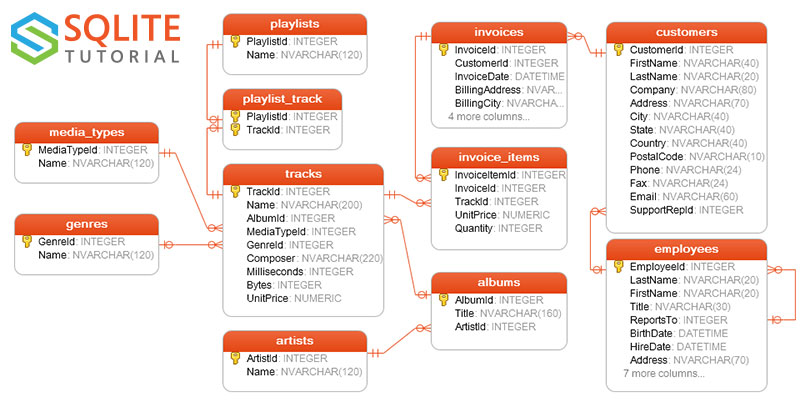

### **Menyiapkan Dataframe**

**Menghubungkan Google Colab dengan Google Drive agar bisa mengakses file dan direktori**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Memuat Database yang tersimpan di direktori Google Drive**

In [17]:
import sqlite3
conn = sqlite3.connect('/content/drive/MyDrive/Colab Notebooks/db/chinook.db')

**Membuat SQL Query untuk menarik kolom-kolom tertentu yang akan dijadikan sebagai Data Frame**

In [20]:
sql = '''
SELECT INVI.InvoiceLineId, INV.InvoiceDate, TR.Name as TrackName, TR.Composer, GR.Name as Genre, INVI.UnitPrice, INVI.Quantity, INVI.UnitPrice*INVI.Quantity as Sales
FROM invoice_items INVI
JOIN invoices INV on INVI.InvoiceId = INV.InvoiceId
JOIN tracks TR on INVI.TrackId = TR.TrackId 
JOIN genres GR on TR.GenreId = GR.GenreId
'''

**Membuat Data Frame dari Database**

In [21]:
import pandas as pd
df = pd.read_sql(sql,conn)
df.head()

,InvoiceLineId,InvoiceDate,TrackName,Composer,Genre,UnitPrice,Quantity,Sales
0,1,2009-01-01 00:00:00,Balls to the Wall,None,Rock,0.99,1,0.99
1,2,2009-01-01 00:00:00,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock,0.99,1,0.99
2,3,2009-01-02 00:00:00,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99
3,4,2009-01-02 00:00:00,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99
4,5,2009-01-02 00:00:00,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99


### **PERTANYAAN 1 :** Tim sales ingin mengetahui performa bulanan atas penjualan track di seluruh gerai

**Menambahkan kolom bulan dan tahun pada Data Frame**

In [22]:
df['InvoiceMonth'] = pd.DatetimeIndex(df['InvoiceDate']).month_name()
df['InvoiceYear'] = pd.DatetimeIndex(df['InvoiceDate']).year
df.head()

,InvoiceLineId,InvoiceDate,TrackName,Composer,Genre,UnitPrice,Quantity,Sales,InvoiceMonth,InvoiceYear
0,1,2009-01-01 00:00:00,Balls to the Wall,None,Rock,0.99,1,0.99,January,2009
1,2,2009-01-01 00:00:00,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock,0.99,1,0.99,January,2009
2,3,2009-01-02 00:00:00,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99,January,2009
3,4,2009-01-02 00:00:00,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99,January,2009
4,5,2009-01-02 00:00:00,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99,1,0.99,January,2009


**Memilih kolom-kolom yang relevan dengan pertanyaan**

In [35]:
df = df[['InvoiceYear','InvoiceMonth','TrackName','Composer','Genre','Sales']]
df.head()

,InvoiceYear,InvoiceMonth,TrackName,Composer,Genre,Sales
0,2009,January,Balls to the Wall,None,Rock,0.99
1,2009,January,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock,0.99
2,2009,January,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
3,2009,January,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
4,2009,January,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99


### **Jawaban untuk Pertanyaan 1**

**Mengelompokkan jumlah penjualan berdasarkan tahun dan bulan**

In [24]:
monthly_sales_pivot = pd.pivot_table(data=df, index='InvoiceYear', columns='InvoiceMonth', values='Sales', aggfunc='sum')
monthly_sales_pivot = monthly_sales_pivot[['January','February','March','April','May','June','July','August','September','October','November','December']]
monthly_sales_pivot

InvoiceMonth,January,February,March,April,May,June,July,August,September,October,November,December
InvoiceYear,,,,,,,,,,,,
2009,35.64,37.62,37.62,37.62,37.62,37.62,37.62,37.62,37.62,37.62,37.62,37.62
2010,52.62,46.62,44.62,37.62,37.62,37.62,37.62,37.62,36.63,37.62,37.62,37.62
2011,37.62,37.62,37.62,51.62,42.62,50.62,37.62,37.62,37.62,37.62,23.76,37.62
2012,37.62,37.62,37.62,37.62,37.62,37.62,39.62,47.62,46.71,42.62,37.62,37.62
2013,37.62,27.72,37.62,33.66,37.62,37.62,37.62,37.62,37.62,37.62,49.62,38.62


**Membuat Visualisasi Data menggunakan Pandas**

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

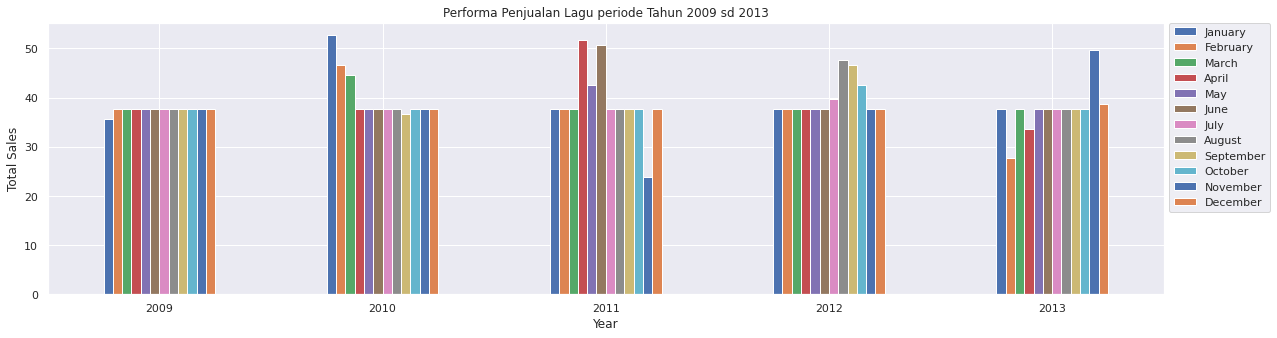

In [26]:
sns.set()

ax = monthly_sales_pivot.plot(kind='bar', figsize=(20,5), ylabel = 'Total Sales', xlabel = 'Year', rot=0)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

plt.title('Performa Penjualan Lagu periode Tahun 2009 sd 2013')
plt.show()

### **Jawaban tambahan untuk Pertanyaan 1**

**Mengelompokkan jumlah penjualan berdasarkan tahun**

In [27]:
monthly_sales = df.groupby(['InvoiceYear','InvoiceMonth']).sum().reset_index()
monthly_sales['InvoiceMonth'] = pd.Categorical(monthly_sales['InvoiceMonth'], ['January','February','March','April','May','June','July','August','September','October','November','December'])
monthly_sales = monthly_sales.sort_values(['InvoiceYear','InvoiceMonth'], ignore_index=True)
monthly_sales.head(5)

,InvoiceYear,InvoiceMonth,Sales
0,2009,January,35.64
1,2009,February,37.62
2,2009,March,37.62
3,2009,April,37.62
4,2009,May,37.62


**Membuat Visualisasi Data menggunakan Seaborn**

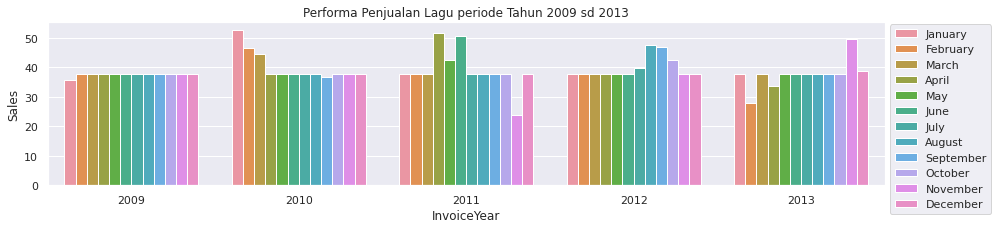

In [28]:
plt.figure(figsize=(15,3))
sns.barplot(x='InvoiceYear', y='Sales', data=monthly_sales, hue='InvoiceMonth')

plt.title('Performa Penjualan Lagu periode Tahun 2009 sd 2013')
plt.legend(bbox_to_anchor=(1,1.02), loc='upper left')
plt.show()

### **PERTANYAAN 2 :** Setelah mengetahui bagaimana performa bulanannya, tim sales juga ingin mengetahui track mana yang menyumbang transaksi terbesar di tahun 2012

**Melihat kembali data penjualan**

In [30]:
df.head()

,InvoiceYear,InvoiceMonth,TrackName,Composer,Genre,Sales
0,2009,January,Balls to the Wall,None,Rock,0.99
1,2009,January,Restless and Wild,"F. Baltes, R.A. Smith-Diesel, S. Kaufman, U. D...",Rock,0.99
2,2009,January,Put The Finger On You,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
3,2009,January,Inject The Venom,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99
4,2009,January,Evil Walks,"Angus Young, Malcolm Young, Brian Johnson",Rock,0.99


### **Jawaban untuk Pertanyaan 2**

**Melakukan seleksi pada penjualan 2012**

In [31]:
sales_2012 = df[df['InvoiceYear'] == 2012]
sales_2012.sample(5)

,InvoiceYear,InvoiceMonth,TrackName,Composer,Genre,Sales
1772,2012,December,Podes Crer,Bino Farias/Da Gama/Lazão/Toni Garrido,Reggae,0.99
1418,2012,February,You Shook Me,J. B. Lenoir/Willie Dixon,Rock,0.99
1783,2012,December,Tarde Em Itapoã,Vários,Latin,0.99
1402,2012,February,Comin' Home,"Paul Stanley, Ace Frehley",Rock,0.99
1591,2012,July,Release,The Tea Party,Alternative & Punk,0.99


**Mengelompokkan dan mengurutkan penjualan selama 2012 berdasarkan judul lagu**

In [33]:
sales_2012 = sales_2012.groupby(['TrackName']).sum().sort_values(by='Sales', ascending=False).reset_index()
sales_2012.head()

,TrackName,InvoiceYear,Sales
0,"""?""",2012,1.99
1,"There's No Place Like Home, Pt. 3",2012,1.99
2,Safety Training,2012,1.99
3,Orientation,2012,1.99
4,"Past, Present, and Future",2012,1.99


**Membuat Visualisasi Data**

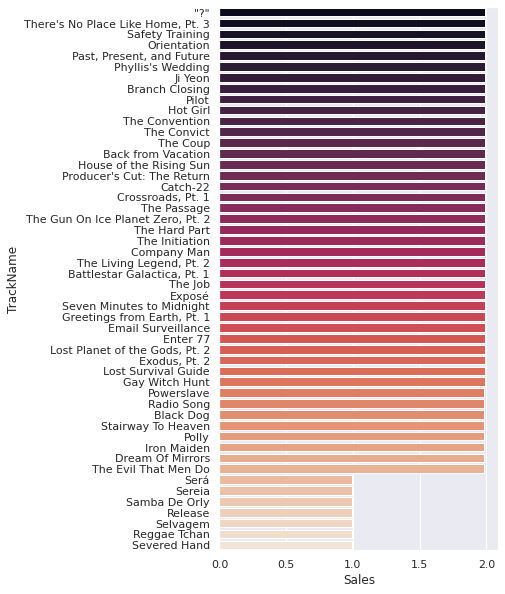

In [34]:
plt.figure(figsize=(5,10))
sns.barplot(x='Sales', y='TrackName', data=sales_2012.iloc[:50], palette='rocket')

plt.show()